## 使用matplotlib绘图的完整流程

在matplotlib中存在两套画图命令：
+ 基于面向对象的方式OO
+ 基于pyplot函数接口的方式

> 作者还是推荐我们使用`object-oriented interface`的方式绘制图形

以后绘图中涉及到的一些常见操作，我会用锚点标注好；以后查起来也非常的快



### 绘图数据

准备绘图数据，包含了几个人的收入信息吧；准备绘制一个柱状图


In [26]:
import numpy as np
import matplotlib.pyplot as plt

#数据字典
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}

group_data = list(data.values()) ##工资
group_names = list(data.keys()) ##人名
group_mean = np.mean(group_data)  ## 平均值

### 创建实例对象
 
采用面向对象的接口，生成`figure.Figure`和`axes.Axes`实例对象

+ `figure.Figure`相当于画布的作用，在上面可以绘制多个图片
+ `axes.Axes`就是一副完整的图片，多个图片可以绘制在一块画布上

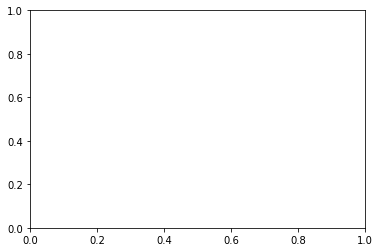

In [3]:
fig, ax = plt.subplots() ##生成实例对象

<BarContainer object of 10 artists>

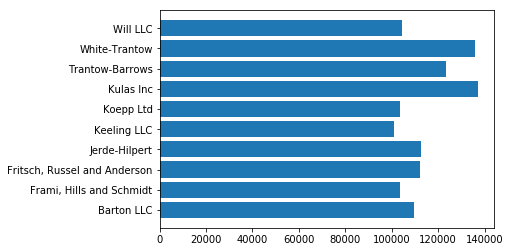

In [4]:
fig,ax=plt.subplots()
ax.barh(group_names,group_data) ##绘制柱状图

### 控制图片样式

这里相当于ggplot2里的`theme`，可以使用`print(plt.style.available)`查看系统自带的样式；使用`plt.style.use('样式名')`使用对应的样式;如下图所示，选择好样式后，就在图中添加了网格线，改变了柱子的颜色


<BarContainer object of 10 artists>

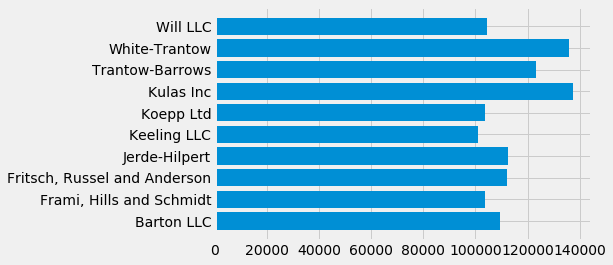

In [6]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots()
ax.barh(group_names,group_data)

### 旋转x轴label
当坐标轴上的label太长的时候，两个刻度之间可能会发生重叠。因此可以通过旋转label的方法调整label的显示。
首先的获取坐标轴上的label对象，使用`pyplot.setp()`函数设置对应的属性

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

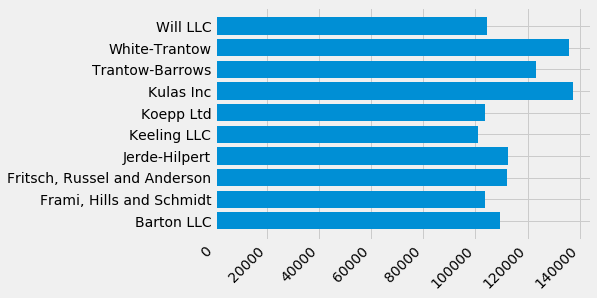

In [10]:
fig,ax=plt.subplots()
ax.barh(group_names,group_data)
xlabels=ax.get_xticklabels() ##获取坐标轴label信息
plt.setp(xlabels,rotation=45,horizontalalignment='right') ##

### 给图片添加label

除了修改刻度线上的label，同样可以给图片的坐标轴label，图片的label，以及坐标轴显示范围。
所有的操作都是采用面向对象接口

+ xlim参数修改坐标轴显示范围
+ xlabel 修改坐标轴label
+ title 修改图片label


[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

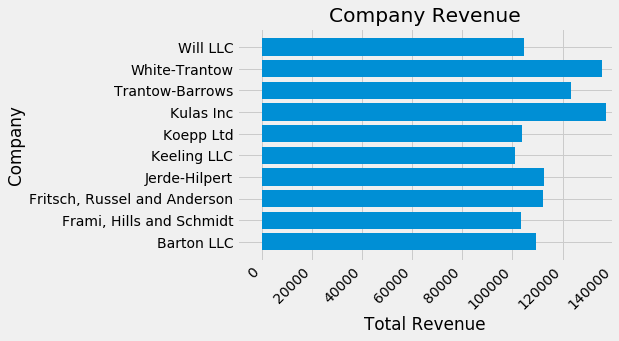

In [11]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

### 批量修改坐标轴刻度label

通过定义一个函数来处理传进来的每个label，传递的函数需要使用`tick`对象进行实例化

> 报错 https://stackoverflow.com/questions/25119193/matplotlib-pyplot-axes-formatter


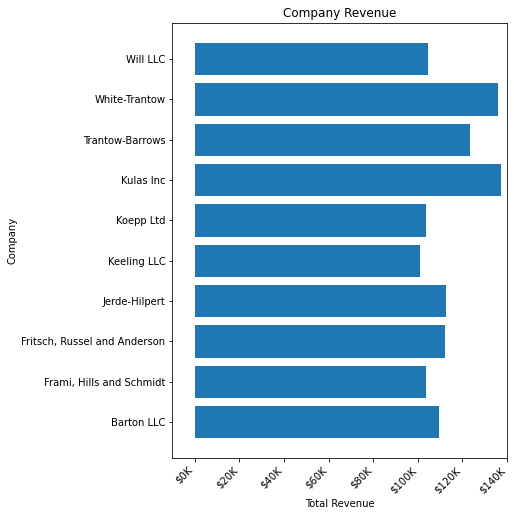

In [13]:
## 定义处理函数
import matplotlib.ticker as tick
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s


fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
#ax.get_xaxis().get_major_formatter()
ax.xaxis.set_major_formatter(tick.FuncFormatter(currency))

### 组合多个axes

直接操作ax对象，再使用对应的作图函数生成对应的图片

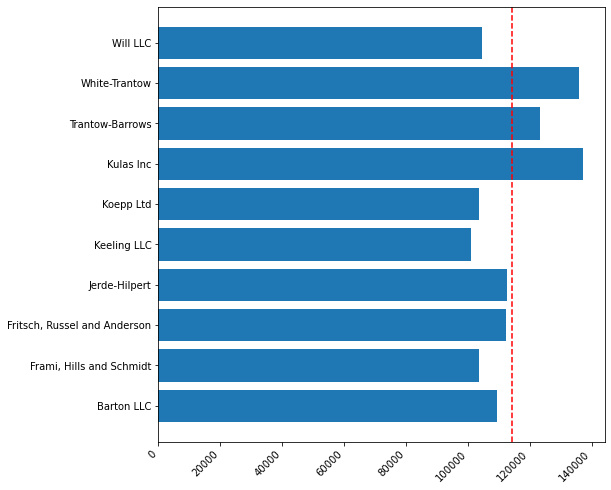

In [19]:
fig,ax =plt.subplots(figsize=(8,8))
ax.barh(group_names,group_data)
labels=ax.get_xticklabels()
plt.setp(labels,rotation=45,horizontalalignment='right')
ax.axvline(group_mean, ls='--',c='red') ##

### 保存图片

调用`figure`对象的`savefig`方法保存图片；在保存图片之前可以查看支持保存的图片格式
+ `transparent`图片背景是否透明
+ `dpi` 图片清晰度
+ `format` 保存格式
+ `bbox_inches="tight"` 图片与画布紧密排布


In [25]:
print(fig.canvas.get_supported_filetypes()) ## 查看支持保存格式
fig.savefig("test.pdf",format="pdf", bbox_inches="tight",transparent=False)

{'ps': 'Postscript', 'eps': 'Encapsulated Postscript', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format'}
